In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs as data
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn import preprocessing

In [40]:
data=pd.read_csv('kmodes_dataset.csv')
data.head()

,Person,hair color,eye color,skin color
0,p1,blonde,amber,fair
1,p2,brunette,gray,brown
2,p3,red,green,brown
3,p4,black,hazel,brown
4,p5,brunette,amber,fair


In [41]:
X=data.drop(['Person'],axis=1)
y=data['skin color']

In [42]:
clf=KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 

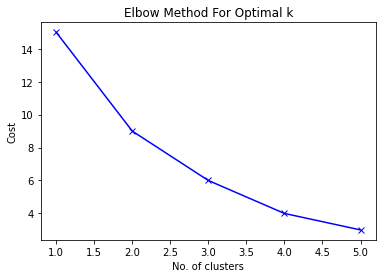

In [43]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 6.0
Run 2, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 7.0
Best run was number 1


array([0, 1, 2, 1, 0, 1, 2, 0], dtype=uint16)

In [45]:
data.insert(0, "Cluster", clusters, True)
data.head()

,Cluster,Person,hair color,eye color,skin color
0,0,p1,blonde,amber,fair
1,1,p2,brunette,gray,brown
2,2,p3,red,green,brown
3,1,p4,black,hazel,brown
4,0,p5,brunette,amber,fair


In [46]:
#encoding
le = preprocessing.LabelEncoder()
X=X.apply(le.fit_transform)
X.head()

,hair color,eye color,skin color
0,1,0,1
1,2,1,0
2,3,2,0
3,0,3,0
4,2,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


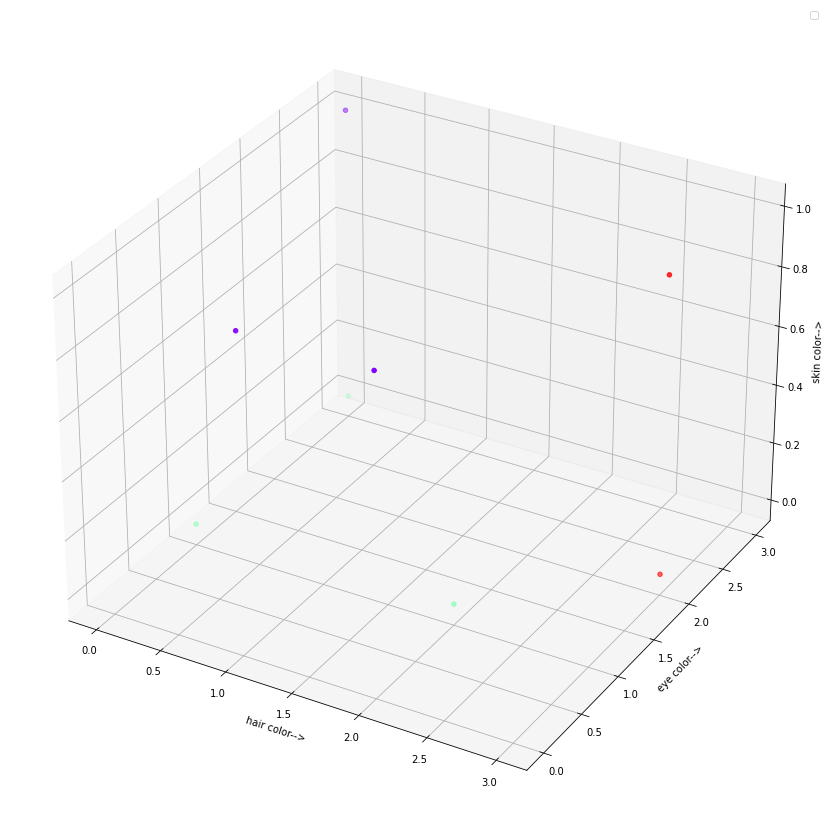

In [47]:
#Visualization


# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['hair color'],X['eye color'], X['skin color'],c=clusters, cmap='rainbow')
# centers=kmeans.cluster_centers_
# ax.scatter(centers[:,0],centers[:,1],c='black', alpha=1)
ax.set_xlabel('hair color-->')
ax.set_ylabel('eye color-->')
ax.set_zlabel('skin color-->')
ax.legend()
plt.show()